<a href="https://colab.research.google.com/github/AparnaBansal01/Court_Judge_Case/blob/main/Plots_n_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
%matplotlib inline 
import seaborn as sns
import warnings                  
warnings.filterwarnings("ignore")

In [3]:
case_18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IIITH/merged_cases_2018.csv')

(array([3537295.,  637360.,  389825.,  296110.,  258668.]),
 array([  0,  20,  40,  60,  80, 100]),
 <a list of 5 Patch objects>)

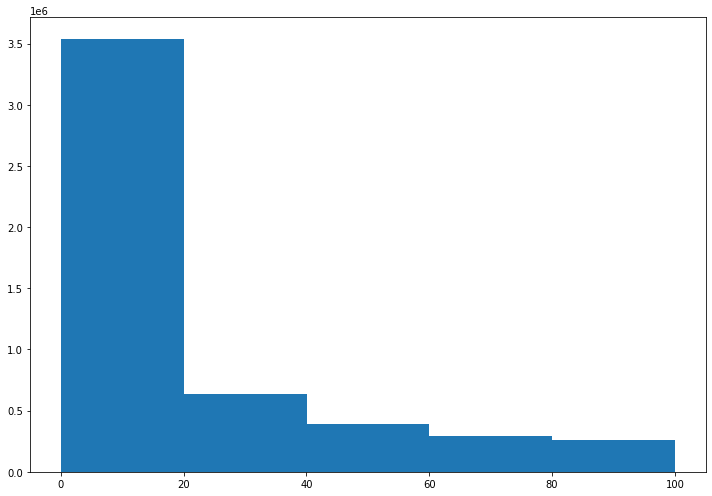

In [ ]:
fig, ax = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
ax.hist(case_18['Duration'],  bins = [0, 20, 40, 60, 80, 100])

In [ ]:
slot = []
for i in range(0,101,5):
  slot.append(i)

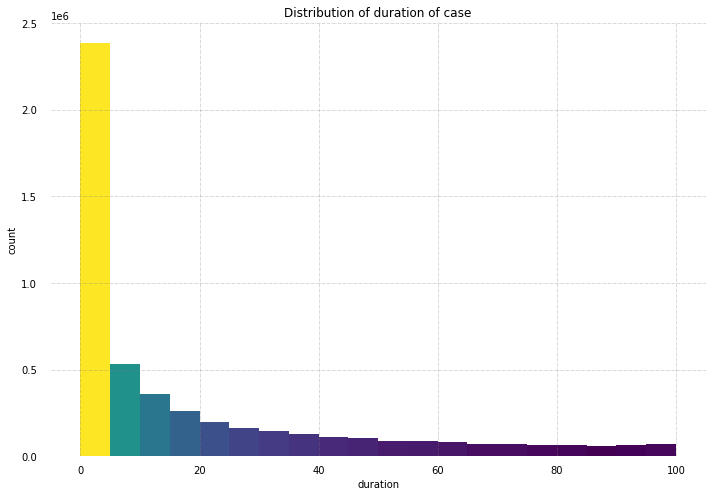

In [ ]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)
axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

N, bins, patches = axs.hist(case_18['Duration'], bins = slot)
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.xlabel("duration")
plt.ylabel("count")
plt.title('Distribution of duration of case')
plt.show()

In [ ]:
case_18.isnull().sum().sum()

6145

In [ ]:
case_18.head()

Unnamed: 0  year  state_code  dist_code  court_no  \
0           0  2018           1          1         1   
1           1  2018           1          1         1   
2           2  2018           1          1         1   
3           3  2018           1          1         1   
4           4  2018           1          1         1   

              judge_position female_defendant female_petitioner  \
0  chief judicial magistrate           0 male            0 male   
1  chief judicial magistrate           0 male            0 male   
2  chief judicial magistrate           0 male            0 male   
3  chief judicial magistrate           0 male          1 female   
4  chief judicial magistrate    -9998 unclear            0 male   

   female_adv_def  female_adv_pet  type_name  purpose_name  disp_name  \
0           -9999               0       1943        2975.0         33   
1           -9999           -9998       1943        2975.0         33   
2           -9999           -9998       1943        2975.0         33   
3           -9999               0       1943        2975.0         33   
4           -9999               0       1943        2975.0         33   

   Duration type_name_s disp_name_s purpose_name_s   state_name district_name  \
0        37    cri.m.a.       other       evidence  Maharashtra     Nandurbar   
1        37    cri.m.a.       other       evidence  Maharashtra     Nandurbar   
2        73    cri.m.a.       other       evidence  Maharashtra     Nandurbar   
3       259    cri.m.a.       other       evidence  Maharashtra     Nandurbar   
4        49    cri.m.a.       other       evidence  Maharashtra     Nandurbar   

                           court_name  
0  Chief Judcial Magistrate Nandurbar  
1  Chief Judcial Magistrate Nandurbar  
2  Chief Judcial Magistrate Nandurbar  
3  Chief Judcial Magistrate Nandurbar  
4  Chief Judcial Magistrate Nandurbar

In [9]:
len(pd.unique(case_18['type_name_s']))

6114

In [13]:
case_18['disp_name_s'].nunique()

52

In [11]:
len(pd.unique(case_18['purpose_name']))

4619

In [ ]:
case_18.fillna('exp',inplace = True)

In [ ]:
px.scatter_3d(case_18, x = 'state_code', y='type_name', z = 'disp_name')

In [8]:
trace = go.Scatter3d(
   x = case_18['Duration'],
    y = case_18['type_name_s'],
    z = case_18['disp_name_s'],
    mode = 'markers', marker = dict(
      size = 12,
      #color = case_18['disp_name_s'], 
      colorscale = 'Viridis'
      )
   )
layout = go.Layout(title = '3D Scatter plot')
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

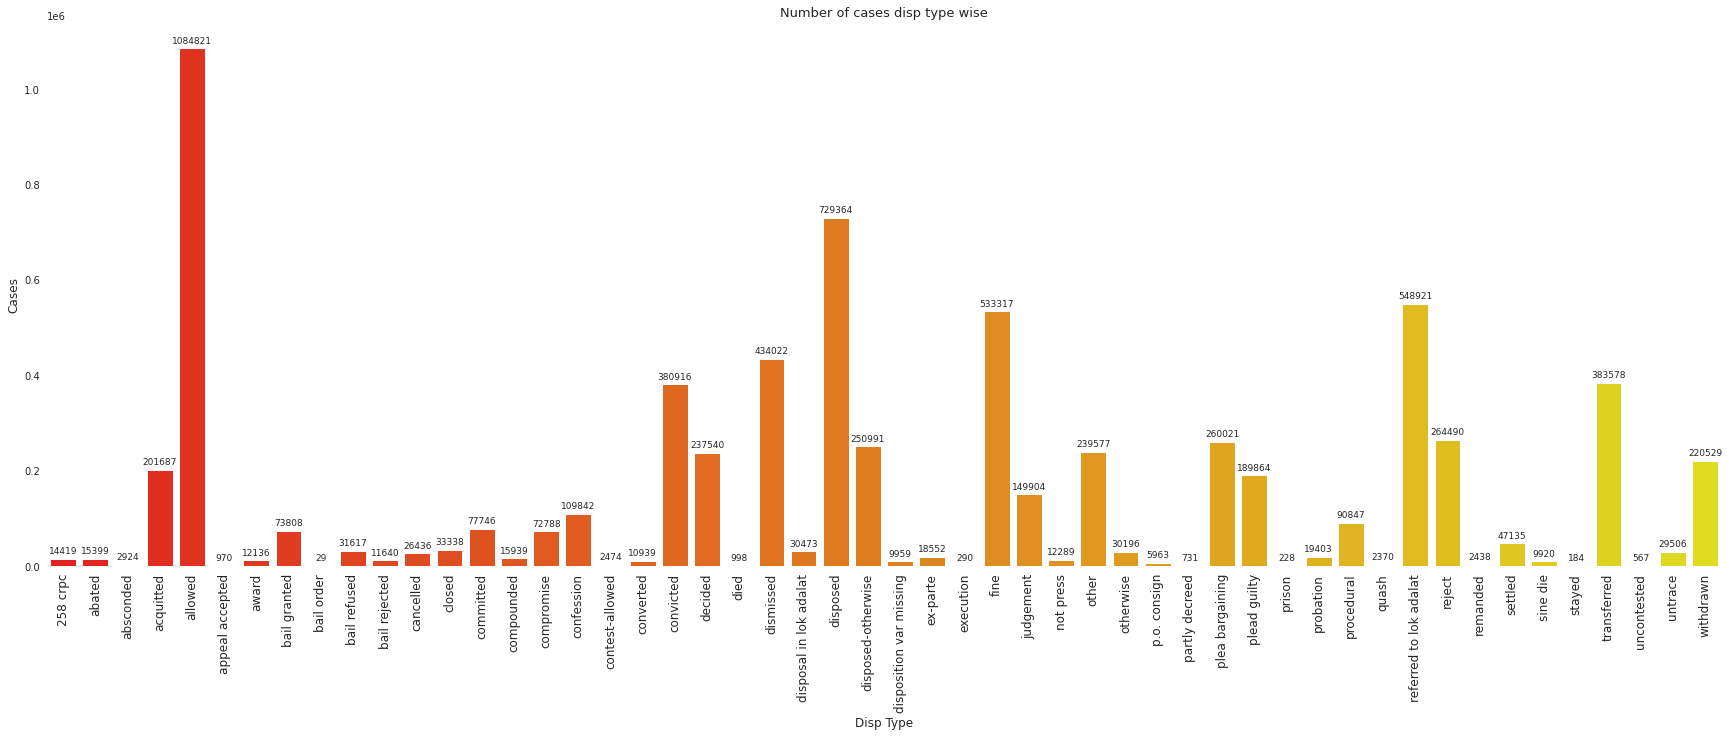

In [29]:
fig=plt.figure(figsize=(30,10))
plt.xticks(rotation=90,fontsize=12)
plt.title('Number of cases disp type wise',fontdict={'fontsize':13})
plots = sns.barplot(y = 'Duration',  x='disp_name_s', data=case_18.groupby('disp_name_s').count().reset_index(),palette='autumn');
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
 
plt.ylabel('Cases',fontdict={'fontsize':12})
plt.xlabel('Disp Type',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);
plt.show()

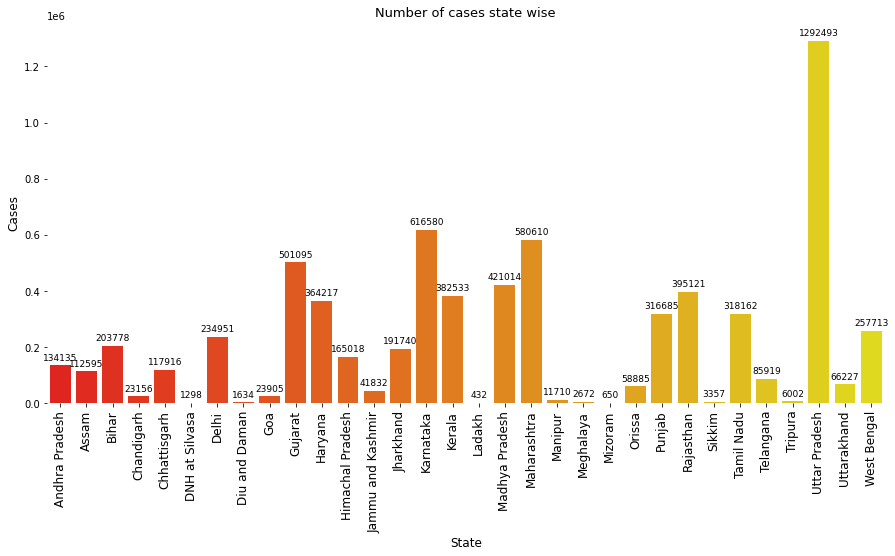

In [ ]:
fig=plt.figure(figsize=(15,7))
plt.xticks(rotation=90,fontsize=12)
plt.title('Number of cases state wise',fontdict={'fontsize':13})
plots = sns.barplot(y = 'type_name',  x='state_name', data=case_18.groupby('state_name').count().reset_index(),palette='autumn');
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
 
plt.ylabel('Cases',fontdict={'fontsize':12})
plt.xlabel('State',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);
plt.show()


In [33]:
fig=plt.figure(figsize=(90,7))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of cases in each case type state-wise',fontdict={'fontsize':14})

plots = sns.barplot(x='state_name',y='Duration',data=case_18.groupby(['disp_name_s','state_name']).count().reset_index(),hue='disp_name_s')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')

plt.ylabel('No. of Cases',fontdict={'fontsize':12})
plt.xlabel('Case Type',fontdict={'fontsize':12})
plt.ylim(0, 5000)
sns.despine(bottom = True, left = True);


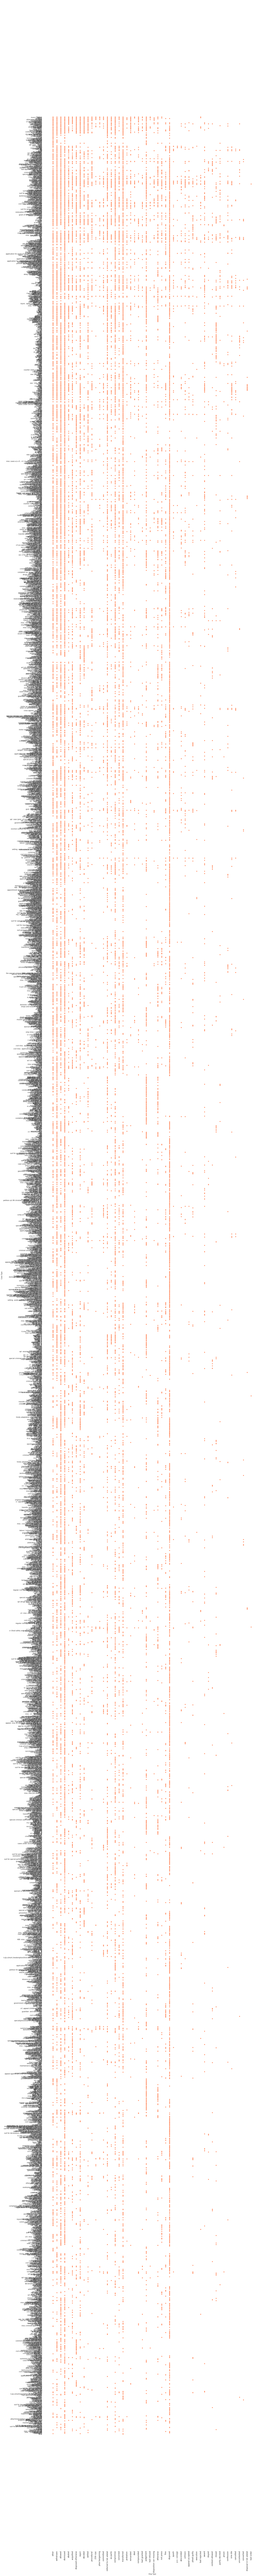

In [34]:
sns.set_style("white")
plt.figure(figsize=(25,300))
plt.xticks(rotation=90,fontsize=12)
sns.scatterplot(y=case_18['type_name_s'], x=case_18['disp_name_s'],color='coral')
plt.ylabel(' Case Type')
plt.xlabel(' Disp Type')
sns.despine(bottom = True, left = True)

In [36]:
temp = case_18.groupby(['state_name'])\
        .agg(mean_duration = ('Duration','mean'),\
             max_duration = ('Duration','max'),\
             min_duration = ('Duration','min'))
temp.head()

mean_duration  max_duration  min_duration
state_name                                               
Andhra Pradesh     102.195736           964         -1118
Assam               84.729251           945          -427
Bihar               68.367238           965         -2554
Chandigarh         205.104768           917             0
Chhattisgarh        46.347417           920           -18

In [39]:
temp['state_name'] = temp.index

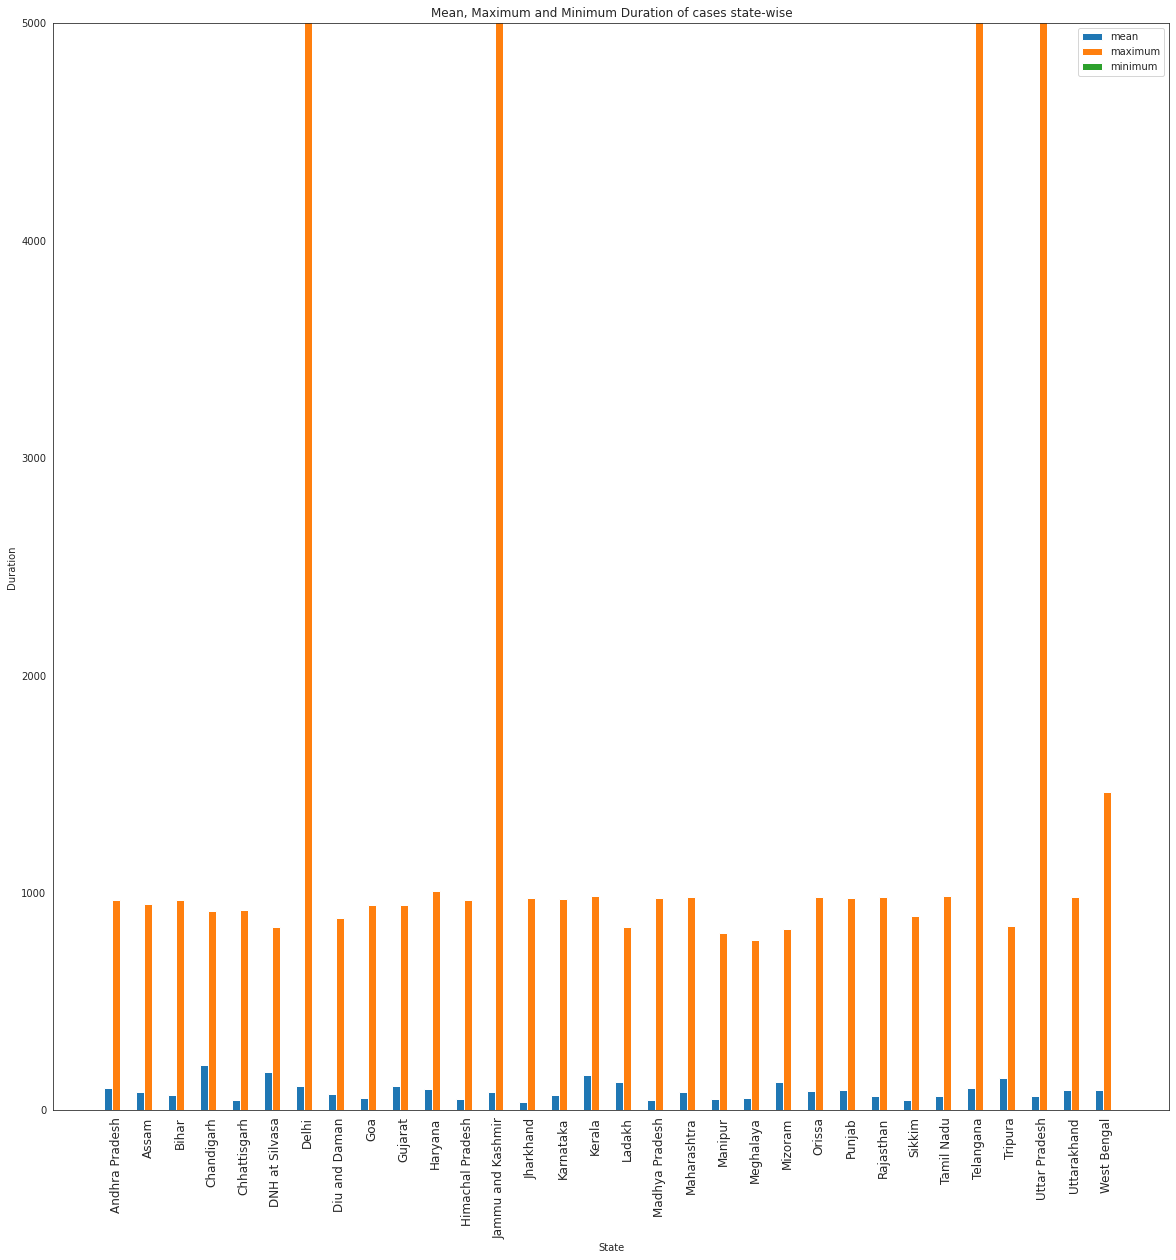

In [44]:
width = 0.25
X_axis = np.arange(len(temp['state_name']))
plt.figure(figsize=(20,20))
plt.xticks(rotation=90,fontsize=12)
plt.bar(X_axis,temp['mean_duration'],width, label = 'mean')
plt.bar(X_axis + width,temp['max_duration'],width, label = 'maximum')
plots = plt.bar(X_axis + width*2,temp['min_duration'],width, label = 'minimum')
plt.xticks(X_axis+width,temp['state_name'])
plt.xlabel("State")
plt.ylabel("Duration")
plt.title("Mean, Maximum and Minimum Duration of cases state-wise")
plt.ylim(0,5000)
plt.legend()
plt.show()

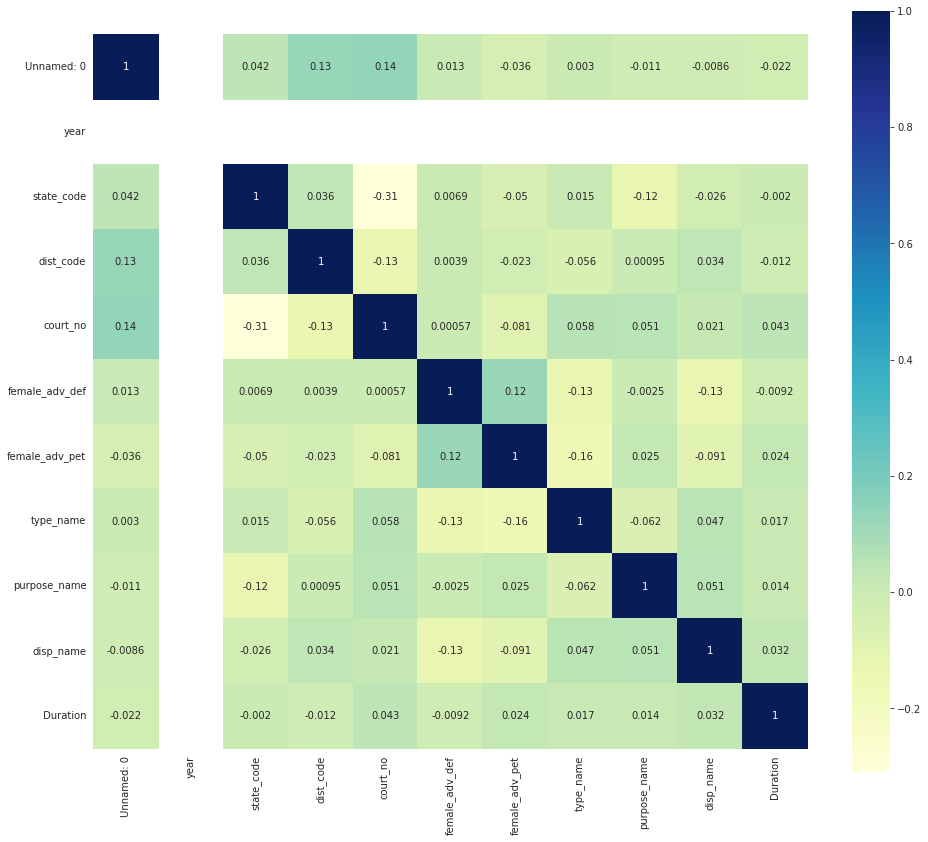

In [20]:
plt.figure(figsize=(16,14))
ax = sns.heatmap(case_18.corr(), cmap="YlGnBu", annot=True, square=True)

In [51]:
case_18['female_defendant'].nunique()

4

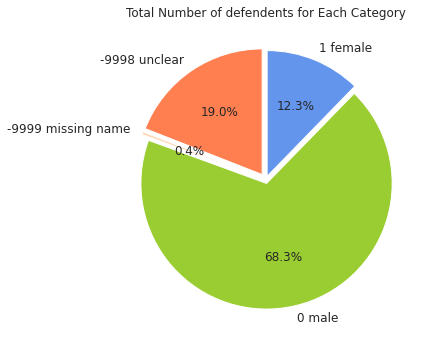

In [52]:
plt.figure(figsize=(6,6))
colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
plt.pie(case_18.groupby(['female_defendant']).Duration.sum(),
    labels=case_18.groupby(['female_defendant']).Duration.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03, 0.03),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of defendents for Each Category')
plt.tight_layout()
plt.show()


In [53]:
case_18['female_petitioner'].nunique()

4

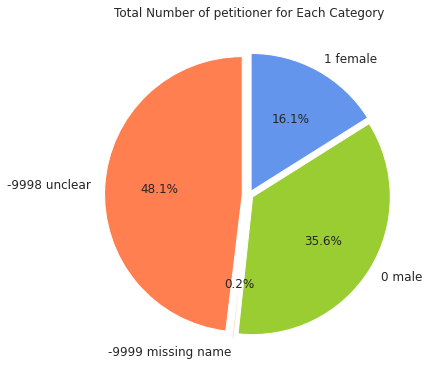

In [54]:
plt.figure(figsize=(6,6))
colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
plt.pie(case_18.groupby(['female_petitioner']).Duration.sum(),
    labels=case_18.groupby(['female_petitioner']).Duration.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03, 0.03),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of petitioner for Each Category')
plt.tight_layout()
plt.show()


In [55]:
case_18['female_adv_def'].nunique()

4

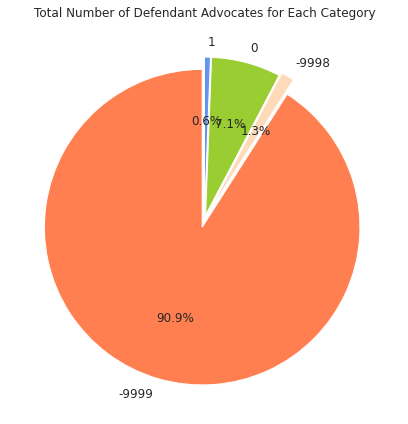

In [56]:
plt.figure(figsize=(6,6))
colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
plt.pie(case_18.groupby(['female_adv_def']).Duration.sum(),
    labels=case_18.groupby(['female_adv_def']).Duration.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03, 0.03),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of Defendant Advocates for Each Category')
plt.tight_layout()
plt.show()


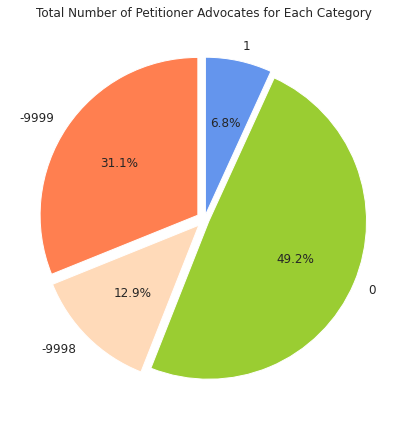

In [58]:
plt.figure(figsize=(6,6))
colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
plt.pie(case_18.groupby(['female_adv_pet']).Duration.sum(),
    labels=case_18.groupby(['female_adv_pet']).Duration.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03, 0.03),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of Petitioner Advocates for Each Category')
plt.tight_layout()
plt.show()


In [45]:
case_18.head()

Unnamed: 0  year  state_code  dist_code  court_no  \
0           0  2018           1          1         1   
1           1  2018           1          1         1   
2           2  2018           1          1         1   
3           3  2018           1          1         1   
4           4  2018           1          1         1   

              judge_position female_defendant female_petitioner  \
0  chief judicial magistrate           0 male            0 male   
1  chief judicial magistrate           0 male            0 male   
2  chief judicial magistrate           0 male            0 male   
3  chief judicial magistrate           0 male          1 female   
4  chief judicial magistrate    -9998 unclear            0 male   

   female_adv_def  female_adv_pet  type_name  purpose_name  disp_name  \
0           -9999               0       1943        2975.0         33   
1           -9999           -9998       1943        2975.0         33   
2           -9999           -9998       1943        2975.0         33   
3           -9999               0       1943        2975.0         33   
4           -9999               0       1943        2975.0         33   

   Duration type_name_s disp_name_s purpose_name_s   state_name district_name  \
0        37    cri.m.a.       other       evidence  Maharashtra     Nandurbar   
1        37    cri.m.a.       other       evidence  Maharashtra     Nandurbar   
2        73    cri.m.a.       other       evidence  Maharashtra     Nandurbar   
3       259    cri.m.a.       other       evidence  Maharashtra     Nandurbar   
4        49    cri.m.a.       other       evidence  Maharashtra     Nandurbar   

                           court_name  
0  Chief Judcial Magistrate Nandurbar  
1  Chief Judcial Magistrate Nandurbar  
2  Chief Judcial Magistrate Nandurbar  
3  Chief Judcial Magistrate Nandurbar  
4  Chief Judcial Magistrate Nandurbar

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

x = case_18[['state_code','disp_name','type_name','purpose_name']]
y = case_18['Duration']

regressor.fit(x, y)  

RandomForestRegressor(random_state=0)

In [ ]:
Y_pred = regressor.predict(case_18[['state_code','disp_name','type_name','purpose_name']])  


In [ ]:
Y_pred[0:5]

array([113.76485751, 113.76485751, 113.76485751, 113.76485751,
       113.76485751])

In [60]:
x = case_18[['state_code','disp_name','type_name','purpose_name']]

In [ ]:
y = case_18['Duration']

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2,15):
    kmeans = KMeans(n_clusters=n_cluster).fit(x)
    label = kmeans.labels_
    sil_coeff = silhouette_score(x, label, metric='euclidean')
    print("cluster={}, The silhouette Coeff = {}".format(n_cluster, sil_coeff))


In [ ]:
kmeans = KMeans(n_clusters = 5, init="k-means++", max_iter = 500, n_init = 10)
clusters = kmeans.fit_predict(x)


finaldata = case_18.copy()
finaldata['Cluster'] = clusters
fig = px.scatter_3d(finaldata, x = 'state_code', y='disp_name', z='type_name',
              color='Cluster', opacity = 0.8)
fig.show()

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)